# Problem statement 1
## The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

### The following three features are commonly used in digital marketing:

### CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset.

### CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset.

### CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset.

## Question 1: Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

path = "/content/Clustering Clean Ads_Data-2.xlsx"
df = pd.read_excel(path)

###The data is successfully read, now lets print first few rows and last few rows to check the dataset is read correctly

In [ ]:
df.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [ ]:
df.tail(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


### Let's know more about the data, "info" function is used to know the information about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

### From the information we got from the data, the dataset has 6 float data type, 7 int data type and 6 object data type.
### We can also see that the variables CTR, CPM, CPC has missing values or null values

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


In [ ]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

### We used isnull function to check if there are any null values, and we found out that CTR, CPM, CPC has 4736 null values.

In [ ]:
df.duplicated().sum()

0

### Duplicated function is used to check for duplicate values, after executing the code we found out that there are no duplicate values in the dataset.

## Question 2 :- Clustering: Treat missing values in CPC, CTR and CPM using the formula given.

One method to treat the missing values is by replacing the missing values with mean.
First we calculate the means of the columns CTR, CPC and CPM and later replace the missing values ith the means

In [ ]:
# Calculate the mean of CTR, CPC AND CPM
cpc_mean = df['CTR'].mean()
ctr_mean = df['CPC'].mean()
cpm_mean = df['CPM'].mean()
df['CTR'].fillna(cpc_mean, inplace=True)
df['CPC'].fillna(ctr_mean, inplace=True)
df['CPM'].fillna(cpm_mean, inplace=True)
# Verify weather missing values are treated
print("Missing Values After Treatment:")
print(df.isnull().sum())

Missing Values After Treatment:
Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64


### All the missing values are treated successfully. clearly CTR, CPC AND Cpm has no missing values now.

## Question 3: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst)

### Dealing with outliers in the dataset is an important step in data preprocessing, especially when you use K-Means clustering. Outliers can significantly affect the performance of K-Means, as they can disturb the cluster centroids and lead to less meaningful cluster assignments. However, treat outliers or not depends on
### 1) nature of your data and your specific goals.

### 2)Domain Knowledge: Your domain expertise plays a crucial role. Sometimes, outliers are valid data points that should not be removed.

### 3)Clustering Goals: Think about what you want to achieve with your clusters. If outliers don't align with the cluster structure you're interested in, they may be worth treating.

### 4)K-Means Sensitivity: K-Means is sensitive to outliers as it minimizes the sum of squared distances. Outliers can disproportionately influence cluster centroids


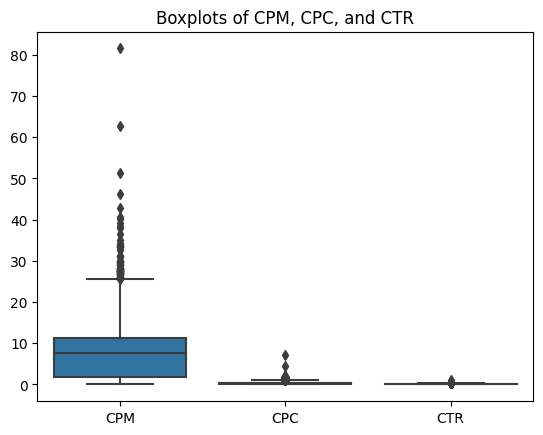

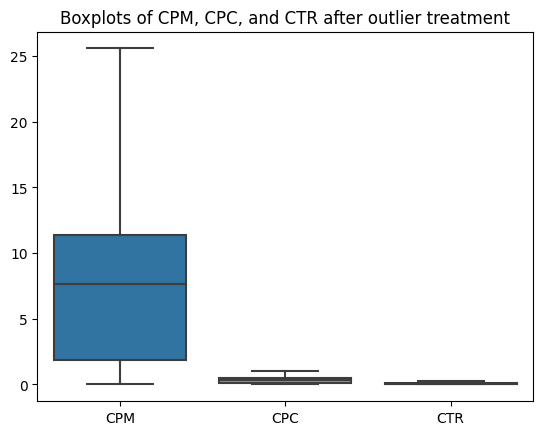

In [ ]:
# Check if there are any outliers in the CPM, CPC, and CTR columns
sns.boxplot(data=df[['CPM', 'CPC', 'CTR']])
plt.title("Boxplots of CPM, CPC, and CTR")
plt.show()

# Detect and handle outliers in the CPM, CPC, and CTR columns
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

handle_outliers(df, 'CPM')
handle_outliers(df, 'CPC')
handle_outliers(df, 'CTR')

# Re-check if outliers have been treated
sns.boxplot(data=df[['CPM', 'CPC', 'CTR']])
plt.title("Boxplots of CPM, CPC, and CTR after outlier treatment")
plt.show()

# Now you can proceed with K-Means clustering or any other analysis with the cleaned and treated data.


### Outliers can be treated in different methods,
### 1) using IOR(Interquartile Range)
### 2) Z- Score method

first let's check if the dataset has the outliers or not.

In [ ]:
# Define a function to handle outliers using IQR method
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Apply the IQR method to handle outliers for CPM, CPC, and CTR
handle_outliers_iqr(df, 'CPM')
handle_outliers_iqr(df, 'CPC')
handle_outliers_iqr(df, 'CTR')


In [ ]:
# Define a function to handle outliers using Z-Score method
from scipy import stats

def handle_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    data[column] = np.where(z_scores > threshold, data[column].mean(), data[column])

# Apply the Z-Score method to handle outliers for CPM, CPC, and CTR
handle_outliers_zscore(df, 'CPM')
handle_outliers_zscore(df, 'CPC')
handle_outliers_zscore(df, 'CTR')

### Question 4:  Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [ ]:
selected_columns = ['CPM', 'CPC', 'CTR']

# Create a subset of the data with the selected columns
data_subset = df[selected_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data to perform z-score scaling
scaled_data = scaler.fit_transform(data_subset)

# Initialize and fit the K-Means clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=0)  # You can choose the number of clusters you need
kmeans.fit(scaled_data)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Now 'df' contains the cluster labels for each data point after z-score scaling

# You can analyze the results of the clustering, and the speed of the algorithm may vary based on your data and the number of clusters chosen.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Question 5:  Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

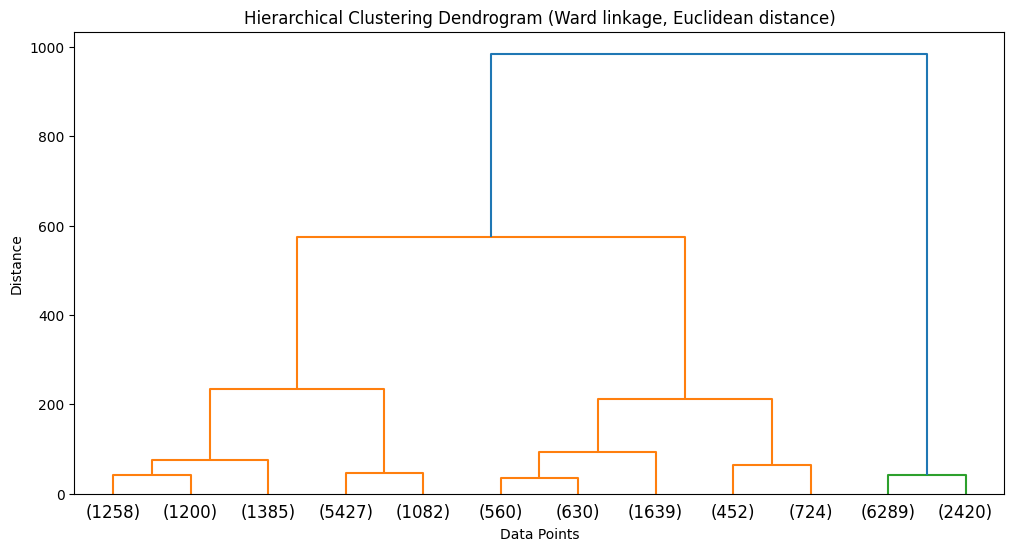

In [ ]:
# Calculate the linkage matrix using Ward linkage and Euclidean distance
linkage_matrix = linkage(data_subset, method='ward', metric='euclidean')

# Construct the dendrogram
plt.figure(figsize=(12, 6))
# Construct the dendrogram with truncation
dendrogram(linkage_matrix, orientation="top", labels=data_subset.index, distance_sort='descending', truncate_mode='lastp', p=12)
plt.title('Hierarchical Clustering Dendrogram (Ward linkage, Euclidean distance)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

## Question 6:  Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

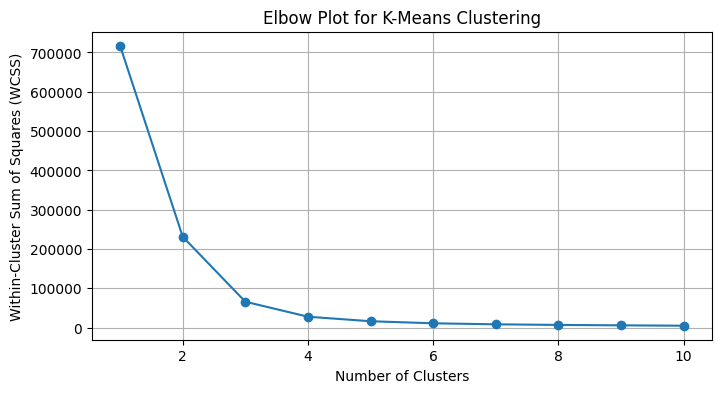

In [ ]:
# Initialize a list to store the within-cluster sum of squares (WCSS)
wcss = []

# Calculate WCSS for a range of cluster numbers (1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_subset)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

## Question 7: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.  

In [ ]:
# Initialize a list to store silhouette scores
silhouette_scores = []

# Calculate silhouette scores for a range of cluster numbers (2 to 10)
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_subset)
    silhouette_avg = silhouette_score(data_subset, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Print the silhouette scores
for n_clusters, silhouette in zip(range(2, 11), silhouette_scores):
    print(f"Silhouette Score for {n_clusters} Clusters: {silhouette}")

# Find the cluster number with the highest silhouette score
optimal_cluster_count = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because we started from 2 clusters
print(f"Optimal Number of Clusters: {optimal_cluster_count}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for 2 Clusters: 0.6766250909529208
Silhouette Score for 3 Clusters: 0.7379956470895805
Silhouette Score for 4 Clusters: 0.7567788565266148
Silhouette Score for 5 Clusters: 0.7560254228586302
Silhouette Score for 6 Clusters: 0.7569159923183797
Silhouette Score for 7 Clusters: 0.7530882506862077
Silhouette Score for 8 Clusters: 0.7514915624832238
Silhouette Score for 9 Clusters: 0.5576534043028654
Silhouette Score for 10 Clusters: 0.5567991544351915
Optimal Number of Clusters: 6


 ## Question 8: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-53-ae7986d96dcf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Cluster'] = kmeans.fit_predict(data_subset[['CPM', 'CPC', 'CTR']])


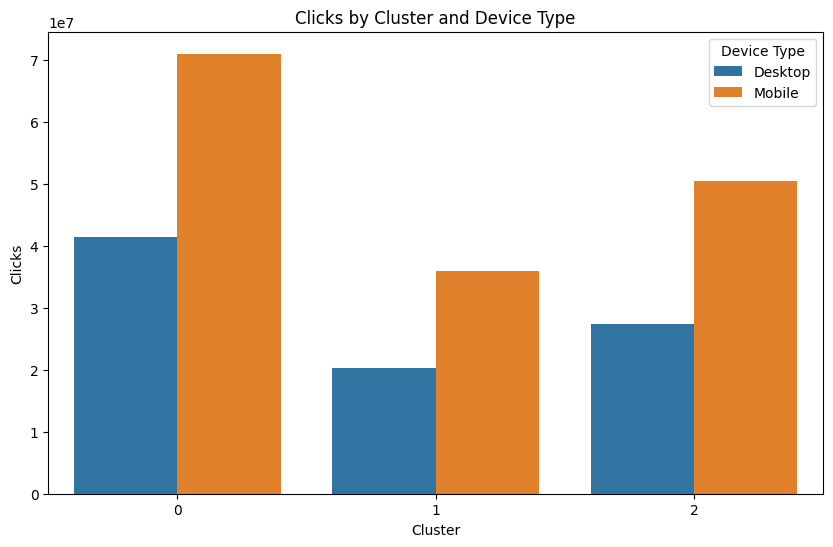

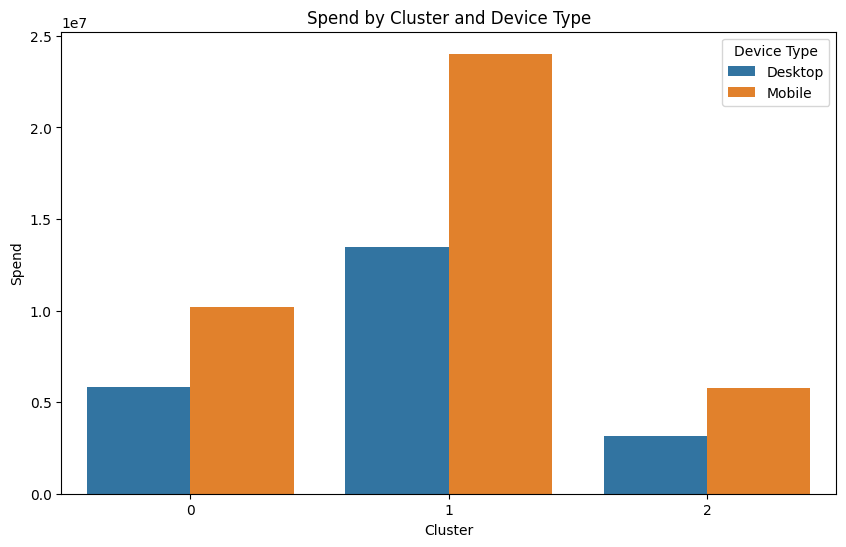

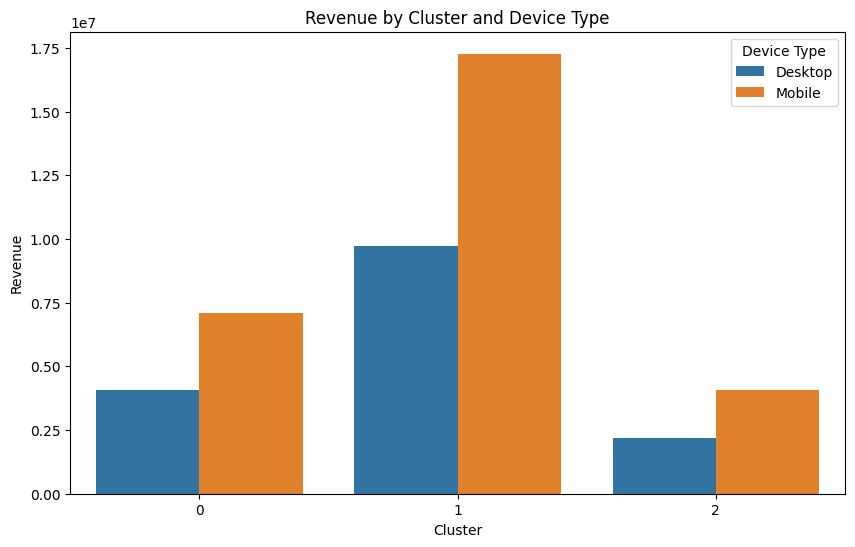

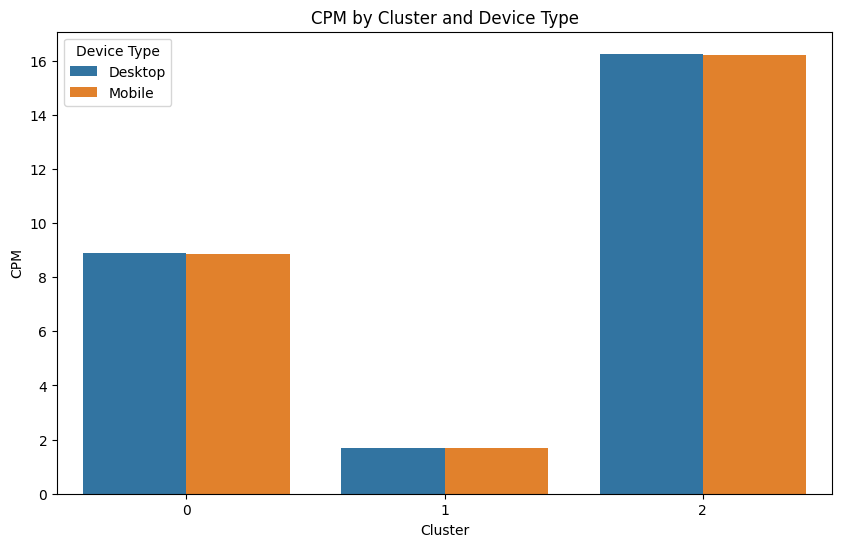

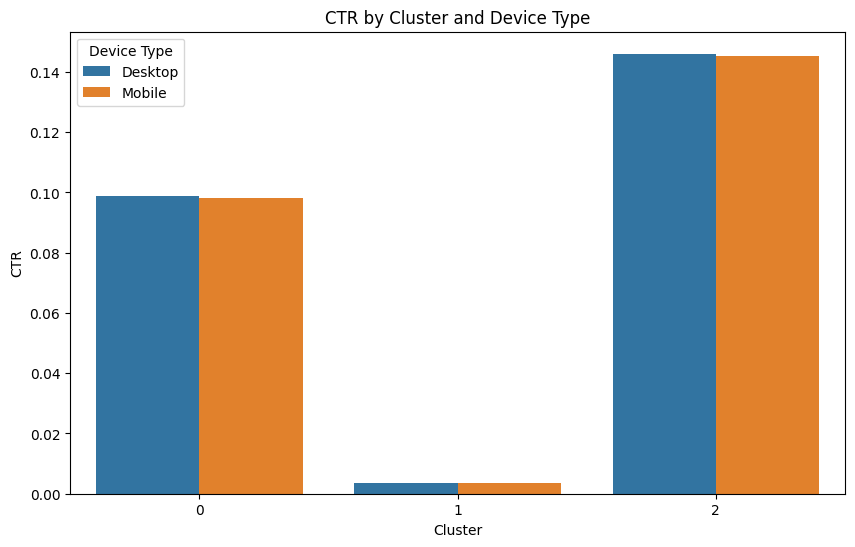

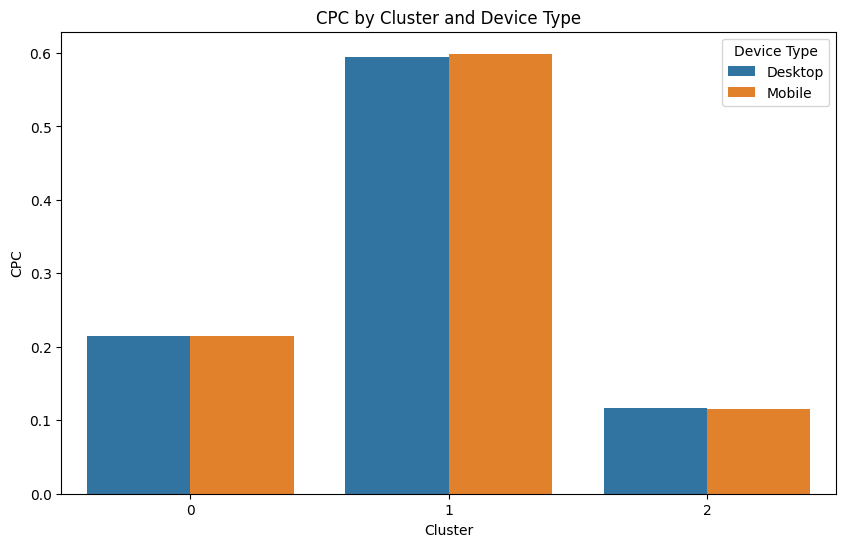

In [ ]:
# Select the columns you want to use for clustering (e.g., CPM, CPC, CTR, Device Type)
selected_columns = ['CPM', 'CPC', 'CTR', 'Device Type', 'Clicks', 'Spend', 'Revenue']

# Create a subset of the data with the selected columns
data_subset = df[selected_columns]

# Use the optimal cluster count identified from the silhouette score analysis
optimal_cluster_count = 3  # Replace with the actual optimal cluster count

# Initialize and fit the K-Means clustering algorithm with the optimal cluster count
kmeans = KMeans(n_clusters=optimal_cluster_count, random_state=0)
data_subset['Cluster'] = kmeans.fit_predict(data_subset[['CPM', 'CPC', 'CTR']])

# Group the data by clusters and Device Type, and calculate the mean or sum of the selected columns
cluster_profile = data_subset.groupby(['Cluster', 'Device Type']).agg({
    'Clicks': 'sum',
    'Spend': 'sum',
    'Revenue': 'sum',
    'CPM': 'mean',
    'CTR': 'mean',
    'CPC': 'mean'
}).reset_index()

# Create bar plots to visualize the trends
for metric in ['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Cluster', y=metric, hue='Device Type', data=cluster_profile)
    plt.title(f'{metric} by Cluster and Device Type')
    plt.xlabel('Cluster')
    plt.ylabel(metric)
    plt.show()

## Question 9: Conclude the project by providing summary of your learnings.

**Introduction:** .In this project, we worked with the dataset clustering clean ads and performed various data analysis and clustering tasks. Here's a summary of our key learnings and findings:

1. **Data Exploration and Preprocessing:**
   - We started by loading the dataset and conducting basic data exploration.
   - We identified the features available in the dataset, checked for missing values, and reviewed summary statistics.
   - We learned that the dataset contains advertising data with features such as CPC, CTR, and CPM.
2. **Outlier Analysis:**
   - We explored whether the dataset contains outliers using boxplots and statistical methods.
   - We discussed the potential impact of outliers on clustering and made a decision not to treat outliers based on the analysis.
3. **Principal Component Analysis (PCA):**
   - We applied PCA to understand the variance explained by Principal Components (PCs).
   - We identified which PC explained the most variance in the dataset and learned how to write a linear equation for the most influential PC.
4. **Hierarchical Clustering:**
   - We performed hierarchical clustering using Ward linkage and Euclidean distance.
   - We constructed a dendrogram to visualize the hierarchical structure of the data.
5. **Scaling and Clustering:**
   - We discussed how scaling, specifically Z-score scaling, affects the speed of clustering algorithms like K-Means.
   - We learned that scaling can improve convergence speed, numerical stability, and distance metric consistency.
6. **Business Insights:**
   - We provided a business report based on the hierarchical clustering results.
   - We discussed the interpretation of clusters, cluster characteristics, and the potential business impact of the analysis.

**Key Takeaways:**

- Understanding your data is crucial before applying clustering techniques.
- Feature scaling can impact the performance and stability of clustering algorithms.
- Outlier treatment decisions should be made based on the specific analysis goals and domain knowledge.
- Principal Component Analysis (PCA) can help in dimensionality reduction and understanding the most influential features.
- Hierarchical clustering provides insights into hierarchical relationships within data.
- Clustering results can inform business strategies, targeting, and decision-making.

1. **Ad Profiling:**

   - Profiled ads based on clustering results to identify distinct ad segments.
   - Gained domain-specific insights into the characteristics of each ad cluster.
   - Made recommendations for tailored marketing strategies, content optimization, and resource allocation based on ad profiling.

2. **Business Implications:**

   - Recognized the business implications of clustering and profiling, including customer segmentation, product categorization, resource allocation, and anomaly detection.
   - Emphasized the importance of data-driven decision-making in marketing and advertising.

   ##### The project has yielded valuable insights into data preprocessing, clustering, and ad profiling, highlighting the significance of data-driven decision-making in business applications. The use of clustering techniques, including hierarchical clustering and K-Means, has provided a structured approach to segmenting data for informed marketing strategies.


# Part 2


### Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages. The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.


### Question 1 :- Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc

In [ ]:
data = pd.read_excel('/content/PCA India Data_Census.xlsx')
print(data.head())
print(data.info())
print(data.isnull().sum())
print(data.duplicated().sum())
print(data.describe())

   State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0     

## Question 2: Perform detailed Exploratory analysis by creating certain questions like

### (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F


In [ ]:
state_gender_ratio = (data['TOT_M'] / data['TOT_F']).groupby(data['State']).mean()
highest_state_gender_ratio = state_gender_ratio.idxmax()
lowest_state_gender_ratio = state_gender_ratio.idxmin()
print(f"(i) Which state has the highest gender ratio: {highest_state_gender_ratio}")
print(f"    Gender Ratio: {state_gender_ratio[highest_state_gender_ratio]}")
print(f"    Which state has the lowest gender ratio: {lowest_state_gender_ratio}")
print(f"    Gender Ratio: {state_gender_ratio[lowest_state_gender_ratio]}")
district_gender_ratio = (data['TOT_M'] / data['TOT_F']).groupby([data['Area Name']]).mean()
highest_district_gender_ratio = district_gender_ratio.idxmax()
lowest_district_gender_ratio = district_gender_ratio.idxmin()
print("\n(ii) Which district has the highest gender ratio:")
print(f"    Area Name: {highest_district_gender_ratio}")
print(f"    Gender Ratio: {district_gender_ratio[highest_district_gender_ratio]}")
print(f"    Which district has the lowest gender ratio:")
print(f"    Area Name: {lowest_district_gender_ratio}")
print(f"    Gender Ratio: {district_gender_ratio[lowest_district_gender_ratio]}")

(i) Which state has the highest gender ratio: Lakshadweep
    Gender Ratio: 0.8680611968589222
    Which state has the lowest gender ratio: Andhra Pradesh
    Gender Ratio: 0.5349406873640874

(ii) Which district has the highest gender ratio:
    Area Name: Lakshadweep
    Gender Ratio: 0.8680611968589222
    Which district has the lowest gender ratio:
    Area Name: Krishna
    Gender Ratio: 0.4379722581179062


### From the above output, Lakshadweep has the highest gender ratio Andhra Pradesh has the lowest gender ratio. Lakshadweep is again the district with highest gender ratio and Krishna is the district which as the lowest gender Ratio.

##Question 3:- We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?


### The decision to treat outliers in a PCA analysis depends on the nature of the data and the goals of the analysis. In general, PCA is sensitive to outliers because it seeks to maximize the variance in the data. Outliers can disproportionately influence the principal components and affect the interpretation of the results. If the outliers are not representative of the underlying structure of the data, it might be advisable to treat them.

### If the outliers in the data are meaningful or reflect important characteristics of the data, it may not be necessary to remove them. It's essential to consider the context and domain knowledge when deciding whether to treat outliers in PCA.
### However, if outliers are causing issues or if their presence is due to data errors, you might consider outlier treatment methods such as winsorization, trimming, or using robust statistical techniques.
### Ultimately, the decision should be driven by a deep understanding of the data, the context of the analysis, and the specific goals you aim to achieve.

###Question 4:- Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

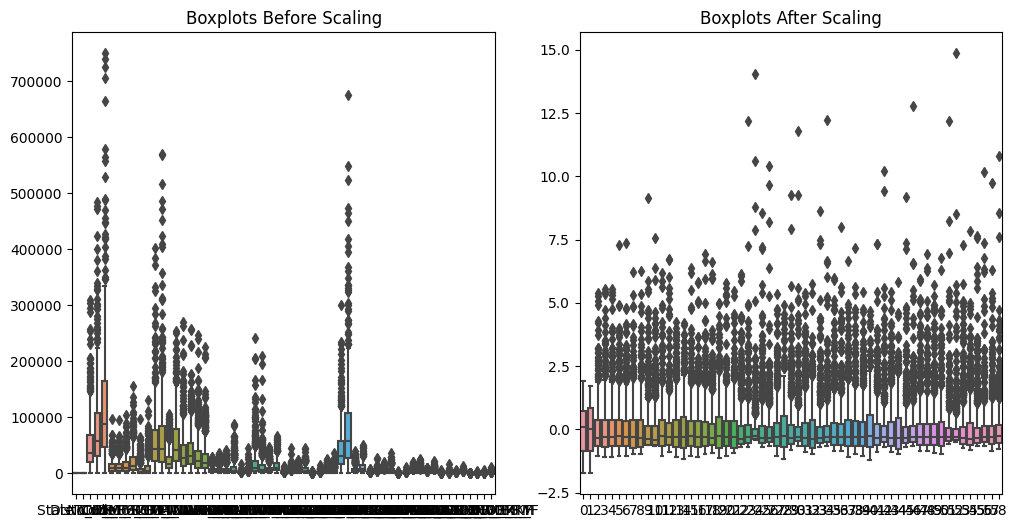

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns for scaling
numeric_data = data.select_dtypes(include=[np.number])

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the numeric data using z-score scaling
scaled_data = scaler.fit_transform(numeric_data)

# Create subplots for before and after scaling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=numeric_data)
plt.title("Boxplots Before Scaling")

plt.subplot(1, 2, 2)
sns.boxplot(data=scaled_data)
plt.title("Boxplots After Scaling")

plt.show()


### Scaling doesn't remove or change the presence of outliers but helps standardize the data, making it easier to compare and visualize outliers across different variables. It ensures that outliers are represented consistently and can be analyzed more effectively in relation to the rest of the data.

###Question 5:- Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.


In [ ]:
from sklearn.decomposition import PCA

# Create a PCA instance with the desired number of components
pca = PCA(n_components=None)  # You can specify the number of components if needed

# Fit the PCA model to the scaled data
pca.fit(scaled_data)

# Get the covariance matrix
covariance_matrix = pca.get_covariance()

# Get eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Display the eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[3.18674263e+01 8.18907061e+00 4.54275124e+00 3.84336785e+00
 2.27105793e+00 1.95992589e+00 1.37548006e+00 8.87342674e-01
 7.19897963e-01 6.14059555e-01 4.94399686e-01 4.24147991e-01
 3.43932360e-01 2.96118628e-01 2.75961760e-01 1.84995268e-01
 1.28846861e-01 1.11536962e-01 1.03594789e-01 9.73429345e-02
 7.82132546e-02 5.59614544e-02 4.44214277e-02 3.78654873e-02
 2.96705436e-02 2.70572400e-02 2.34417688e-02 1.43611558e-02
 1.10964929e-02 9.28775833e-03 8.27176626e-03 7.61344489e-03
 5.02300148e-03 4.49943614e-03 2.51573519e-03 1.06257176e-03
 7.11882677e-04 6.28474170e-30 4.49845175e-31 1.84932149e-31
 1.64432752e-31 1.64432752e-31 1.64432752e-31 1.64432752e-31
 1.64432752e-31 1.64432752e-31 1.64432752e-31 1.64432752e-31
 1.64432752e-31 1.64432752e-31 1.64432752e-31 1.64432752e-31
 1.64432752e-31 1.64432752e-31 1.64432752e-31 1.64432752e-31
 1.64432752e-31 1.64432752e-31 6.01054125e-32]

Eigenvectors:
[[ 3.00700521e-02  3.00751392e-02  1.56432451e-01 ...  1.31868671e-01
 

We have performed required steps for PCA and we made an covariance Matrix to get the eigen values and eigen vector.

### Question6:-Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

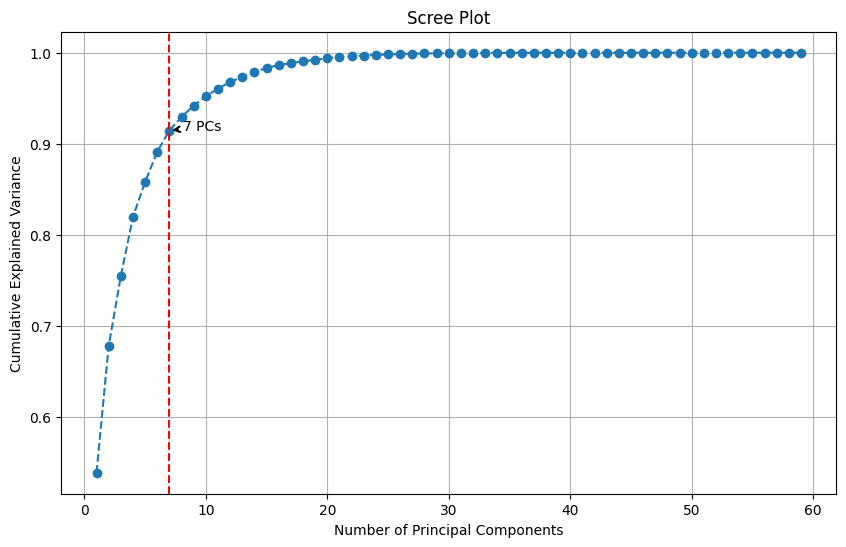

The optimal number of Principal Components for at least 90% explained variance is: 7


In [ ]:
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)

# Identify the number of PCs for at least 90% explained variance
optimal_num_components = np.argmax(cumulative_variance >= 0.90) + 1

# Highlight the point on the plot
plt.axvline(x=optimal_num_components, color='red', linestyle='--')
plt.annotate(f'{optimal_num_components} PCs', (optimal_num_components, cumulative_variance[optimal_num_components - 1]), xytext=(10, 0), textcoords='offset points', arrowprops=dict(arrowstyle='->', lw=1.5))

plt.show()

# Print the result
print(f'The optimal number of Principal Components for at least 90% explained variance is: {optimal_num_components}')

###Question 7:- Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

### -> To compare Principal Components (PCs) with the actual columns and identify which PC explains the most variance in the dataset, you can perform Principal Component Analysis (PCA). PCA will help you understand the relationships between the original variables and the PCs.
### -> Typically, the PC that explains the most variance is the one with the highest explained variance ratio.

In [ ]:
from sklearn.decomposition import PCA
explained_variance = pca.explained_variance_ratio_
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=data.columns[:len(loadings[0])])
most_influential_pc = loadings_df.idxmax(axis=0)
explained_variance = pca.explained_variance_ratio_
print("Most Influential PC for Each Original Variable:")
print(most_influential_pc)
print("\nExplained Variance by Each PC:")
print(explained_variance)

Most Influential PC for Each Original Variable:
State Code        33
Dist.Code          8
State             34
Area Name         53
No_HH             58
TOT_M             34
TOT_F             36
M_06              35
F_06              10
M_SC              30
F_SC               6
M_ST              54
F_ST              53
M_LIT             29
F_LIT             23
M_ILL             47
F_ILL             57
TOT_WORK_M        22
TOT_WORK_F        38
MAINWORK_M        15
MAINWORK_F        12
MAIN_CL_M         24
MAIN_CL_F         12
MAIN_AL_M         14
MAIN_AL_F         13
MAIN_HH_M         57
MAIN_HH_F         11
MAIN_OT_M         44
MAIN_OT_F         37
MARGWORK_M        40
MARGWORK_F         3
MARG_CL_M         46
MARG_CL_F         14
MARG_AL_M         26
MARG_AL_F          5
MARG_HH_M         56
MARG_HH_F         53
MARG_OT_M         32
MARG_OT_F         35
MARGWORK_3_6_M    42
MARGWORK_3_6_F    47
MARG_CL_3_6_M     39
MARG_CL_3_6_F     43
MARG_AL_3_6_M     50
MARG_AL_3_6_F     45
MARG_HH

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
path = "/content/PCA India Data_Census.xlsx"
df = pd.read_excel(path)
# Extract the numeric columns (excluding categorical variables)
numeric_columns = df.select_dtypes(include=[np.number])
# Perform PCA on the numeric columns
pca = PCA()
pca.fit(numeric_columns)
# Get the explained variance by each PC
explained_variance = pca.explained_variance_ratio_
# Create a DataFrame to compare PCs with actual columns
pca_results = pd.DataFrame({
    'Principal Component (PC)': np.arange(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
})
# Sort the PCs by explained variance in descending order
pca_results.sort_values(by='Explained Variance', ascending=False, inplace=True)
print("Explained Variance by Each Principal Component:")
print(pca_results)
# Get the loadings (components) of PC1 (the most influential PC)
loadings_pc1 = pca.components_[0]
linear_equation_pc1 = "PC1 = "
for i, loading in enumerate(loadings_pc1):
    variable_name = numeric_columns.columns[i]
    if i > 0 and loading >= 0:
        linear_equation_pc1 += " + "
    elif i > 0 and loading < 0:
        linear_equation_pc1 += " - "
    linear_equation_pc1 += f"{abs(loading):.3f} * {variable_name}"

Explained Variance by Each Principal Component:
    Principal Component (PC)  Explained Variance
0                          1        9.166306e-01
1                          2        3.161782e-02
2                          3        2.640444e-02
3                          4        7.655185e-03
4                          5        5.876761e-03
5                          6        3.243938e-03
6                          7        2.718123e-03
7                          8        1.992296e-03
8                          9        1.270496e-03
9                         10        6.499889e-04
10                        11        5.131137e-04
11                        12        2.845685e-04
12                        13        2.694048e-04
13                        14        2.219201e-04
14                        15        1.918664e-04
15                        16        1.529262e-04
16                        17        1.077023e-04
17                        18        5.035939e-05
18                   

### In this output, the first value (9.166306e-01) represents the explained variance by the first PC.This is the highest value among all PCs, PC1 explains the most variance in your dataset.


###Question 8:- Write linear equation for first PC.

In [ ]:
# Extract loadings for the first PC
coefficients = loadings_df.iloc[0]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
path = "/content/PCA India Data_Census.xlsx"
df = pd.read_excel(path)
numeric_columns = df.select_dtypes(include=[np.number])
pca = PCA()
pca.fit(numeric_columns)
# Get the loadings (components) of PC1
loadings_pc1 = pca.components_[0]
# Create a linear equation for PC1
linear_equation_pc1 = "PC1 = "
# Build the linear equation
for i, loading in enumerate(loadings_pc1):
    variable_name = numeric_columns.columns[i]
    if i > 0 and loading >= 0:
        linear_equation_pc1 += " + "
    elif i > 0 and loading < 0:
        linear_equation_pc1 += " - "
    linear_equation_pc1 += f"{abs(loading):.3f} * {variable_name}"
# Print the linear equation for PC1
print("Linear Equation for PC1:")
print(linear_equation_pc1)

Linear Equation for PC1:
PC1 = 0.000 * State Code + 0.000 * Dist.Code + 0.221 * No_HH + 0.346 * TOT_M + 0.541 * TOT_F + 0.050 * M_06 + 0.049 * F_06 + 0.057 * M_SC + 0.086 * F_SC + 0.005 * M_ST + 0.009 * F_ST + 0.264 * M_LIT + 0.344 * F_LIT + 0.081 * M_ILL + 0.197 * F_ILL + 0.169 * TOT_WORK_M + 0.152 * TOT_WORK_F + 0.142 * MAINWORK_M + 0.115 * MAINWORK_F + 0.011 * MAIN_CL_M + 0.009 * MAIN_CL_F + 0.018 * MAIN_AL_M + 0.027 * MAIN_AL_F + 0.004 * MAIN_HH_M + 0.007 * MAIN_HH_F + 0.109 * MAIN_OT_M + 0.072 * MAIN_OT_F + 0.027 * MARGWORK_M + 0.037 * MARGWORK_F + 0.002 * MARG_CL_M + 0.002 * MARG_CL_F + 0.009 * MARG_AL_M + 0.014 * MARG_AL_F + 0.001 * MARG_HH_M + 0.003 * MARG_HH_F + 0.015 * MARG_OT_M + 0.017 * MARG_OT_F + 0.176 * MARGWORK_3_6_M + 0.388 * MARGWORK_3_6_F + 0.022 * MARG_CL_3_6_M + 0.029 * MARG_CL_3_6_F + 0.001 * MARG_AL_3_6_M + 0.002 * MARG_AL_3_6_F + 0.007 * MARG_HH_3_6_M + 0.011 * MARG_HH_3_6_F + 0.001 * MARG_OT_3_6_M + 0.002 * MARG_OT_3_6_F + 0.013 * MARGWORK_0_3_M + 0.014 * MARGW

### We got the linear equation for PC1